<a href="https://colab.research.google.com/github/Theanh130124/Datamining_srccode/blob/main/Buoi2_Bai3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
car_df = pd.read_csv('/content/car.csv' ,encoding ='utf-8' ,delimiter='|' , on_bad_lines ='skip')
print(car_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39421 entries, 0 to 39420
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   car_model    39421 non-null  object
 1   km           39421 non-null  object
 2   imp_exp      39421 non-null  object
 3   km_1         39421 non-null  object
 4   imp_exp_1    39421 non-null  object
 5   car_type     39421 non-null  object
 6   out_color    39421 non-null  object
 7   in_color     39421 non-null  object
 8   door_num     39421 non-null  object
 9   seat_num     39421 non-null  object
 10  new_old      39421 non-null  object
 11  car_year     39421 non-null  object
 12  title        39421 non-null  object
 13  price        39421 non-null  object
 14  area         39421 non-null  object
 15  poster_name  39421 non-null  object
 16  poster_add   39421 non-null  object
 17  poster_tel   39421 non-null  object
dtypes: object(18)
memory usage: 5.4+ MB
None


In [24]:
car_df.rename(columns={'poster_tel,,,,,,,,':'poster_tel'},inplace=True)

In [25]:
car_df = car_df.drop(columns=['km_1','imp_exp_1','poster_name','poster_add','poster_tel','title'])
print(car_df.head())

   car_model        km    imp_exp car_type out_color   in_color door_num  \
0  acura-mdx      0 Km  Nhập khẩu      SUV       Đen        Đen    5 cửa   
1  acura-mdx      0 Km  Nhập khẩu      SUV       Bạc        Đen    5 cửa   
2  acura-mdx      0 Km  Nhập khẩu      SUV       Bạc  Nhiều màu    5 cửa   
3  acura-mdx      0 Km  Nhập khẩu      SUV       Đen        Kem    5 cửa   
4  acura-mdx  9,600 Km  Nhập khẩu      SUV     Trắng        Cát    5 cửa   

  seat_num new_old car_year           price    area  
0    7 chỗ   Xe cũ     2007       630 Triệu  TP HCM  
1    7 chỗ   Xe cũ     2007       580 Triệu  Hà Nội  
2    7 chỗ   Xe cũ     2006       465 Triệu  TP HCM  
3    7 chỗ  Xe mới     2016  4 Tỷ 665 Triệu  TP HCM  
4    7 chỗ   Xe cũ     2015  3 Tỷ 400 Triệu  TP HCM  


In [26]:
#Chuẩn hóa cột km
car_df['km'] = car_df['km'].str.replace(' Km','')
car_df['km'] = car_df['km'].str.replace(',','').astype(np.int64)
#Chuẩn hóa cột door_num
car_df['door_num'] = car_df['door_num'].str.replace('cửa','').astype(np.int64)
#Chuẩn hóa cột seat_num
car_df['seat_num'] = car_df['seat_num'].str.replace('chỗ','').astype(np.int64)
car_df['price'] =car_df['price'].str.replace('Tỷ','')
car_df['price'] =car_df['price'].str.replace('Triệu','')
car_df['price'] =car_df['price'].str.replace(' ','').astype(np.float64)
# print(car_df.head())
# print(car_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39421 entries, 0 to 39420
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   car_model  39421 non-null  object 
 1   km         39421 non-null  int64  
 2   imp_exp    39421 non-null  object 
 3   car_type   39421 non-null  object 
 4   out_color  39421 non-null  object 
 5   in_color   39421 non-null  object 
 6   door_num   39421 non-null  int64  
 7   seat_num   39421 non-null  int64  
 8   new_old    39421 non-null  object 
 9   car_year   39421 non-null  object 
 10  price      39421 non-null  float64
 11  area       39421 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 3.6+ MB
None


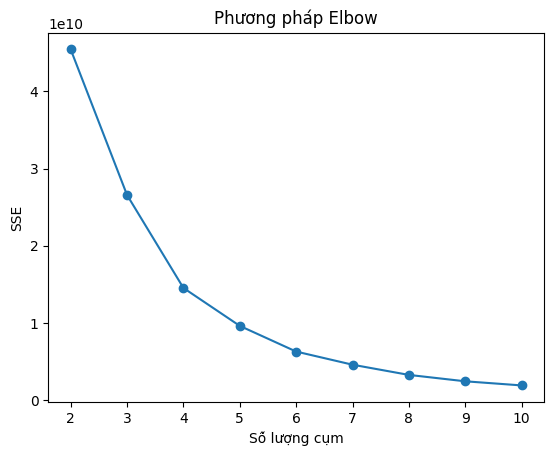

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#Tìm số cụm tối ưu sử dụng phương pháp Elbow
max_clusters = 10
sse = []
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(car_df[['price']])
    sse.append(kmeans.inertia_)
#Vẽ biểu đồ Elbow
plt.plot(range(2, max_clusters + 1), sse, marker='o')
plt.xlabel('Số lượng cụm')
plt.ylabel('SSE')
plt.title('Phương pháp Elbow')
plt.show()


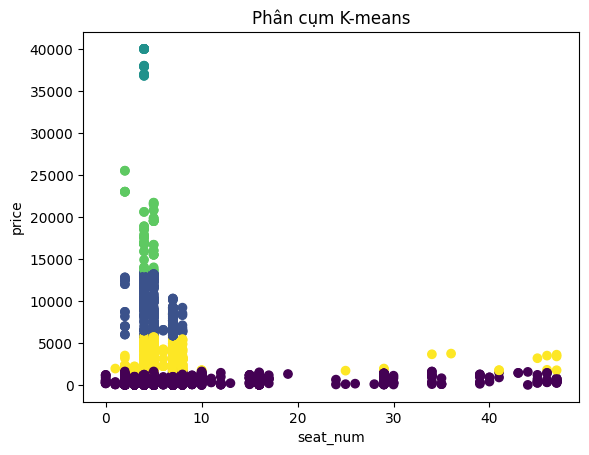

In [34]:
#Số cụm tối uuw dưa trên biểu đồ Elbow
num_clusters = 5
#Ap dụng thuật toán K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(car_df[['price']])
#Gán nhãn cho dữ liệu
car_df['Cluster'] = kmeans.labels_
#Vẽ biểu đồ phân cụm
plt.scatter(car_df['seat_num'],car_df['price'], c=car_df['Cluster'], cmap='viridis')
plt.xlabel('seat_num')
plt.ylabel('price')
plt.title('Phân cụm K-means')
plt.show()
#